Installing PySpark and required libraries

In [1]:
#Install PySpark

!pip install pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder \
  .appName("IntroToSpark") \
  .getOrCreate()


Creating an RDD (Resilient Distributed Dataset)


In [2]:
sc = spark.sparkContext #Get Spark Context

#Create an RDD from a list
data = {1,2,3,4,5,6,7,8,9}
rdd = sc.parallelize(data)

#Perfom a transformation (map: multiply by 2)

transformed_rdd = rdd.map(lambda x: x*2)

#Perform an action (collect results)
result = transformed_rdd.collect()
print("Transformed RDD: ", result)

Transformed RDD:  [2, 4, 6, 8, 10, 12, 14, 16, 18]


Creating a Data Frame
Data Frames are distributed collections of structured data


In [3]:
data = [
    ("Alice", 25, "HR"),
    ("Bob", 30, "IT"),
    ("Charlie", 35, "Finance")
]

columns = ["Name", "Age", "Department"]

df = spark.createDataFrame(data,columns)

df.show()
filtered_df = df.filter(df.Age>28)
filtered_df.show()

+-------+---+----------+
|   Name|Age|Department|
+-------+---+----------+
|  Alice| 25|        HR|
|    Bob| 30|        IT|
|Charlie| 35|   Finance|
+-------+---+----------+

+-------+---+----------+
|   Name|Age|Department|
+-------+---+----------+
|    Bob| 30|        IT|
|Charlie| 35|   Finance|
+-------+---+----------+



Performing a GroupBy and Aggregation

In [4]:
df.groupBy("Department").avg("Age").show()


+----------+--------+
|Department|avg(Age)|
+----------+--------+
|        HR|    25.0|
|   Finance|    35.0|
|        IT|    30.0|
+----------+--------+



Read External Data (CSV)

In [15]:
#Upload CSV to Google Colab
from google.colab import files
uploaded = files.upload()

#Read CSV into DataFrame
df_csv = spark.read.csv("sample.csv", header=True, inferSchema=True)
df_csv.show(5)


Saving sample.csv to sample.csv
+-------+---+----------+
|   Name|Age|Department|
+-------+---+----------+
|    Joy| 35|        IT|
|    Kim| 45|   Finance|
|Geralyn| 36|        HR|
|  Davie| 40|        IT|
|   Aris| 45|   Finance|
+-------+---+----------+
only showing top 5 rows



Visualizing Data in Spark

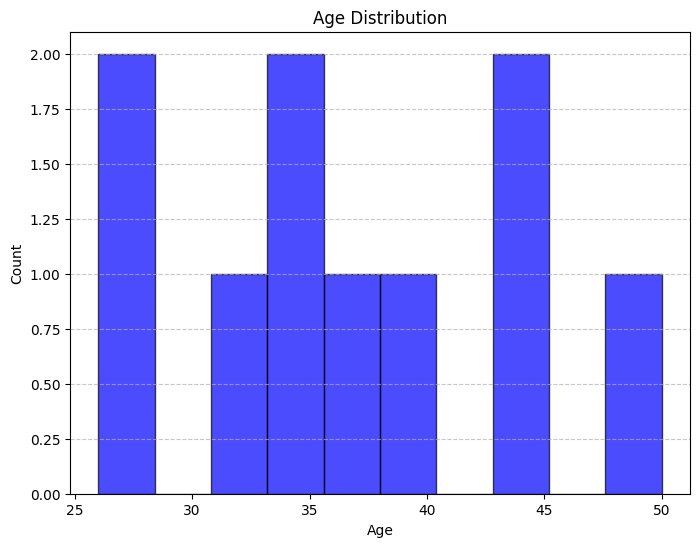

In [16]:
#Use matplotlib for visualization

import matplotlib.pyplot as plt
#Extract the "Age" column as a list
age_data = df_csv.select("Age").rdd.flatMap(lambda x: x).collect()

#Create a histogram

plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7) #Add gridlines for clarity
plt.show()

Bar Chart for Average Age by Department

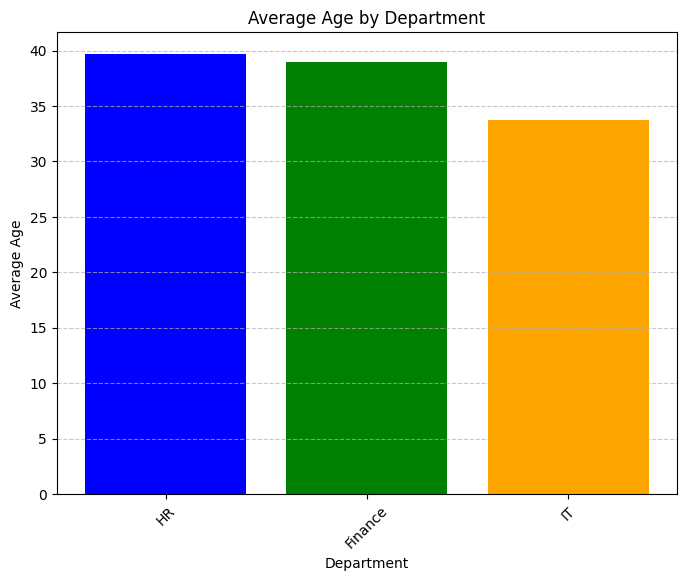

In [19]:
#Step 1: Group by "Department" and compute average age
avg_age_df = df_csv.groupBy("Department").avg("Age").withColumnRenamed("avg(Age)", "Average Age")

#Step 2: Collect the data for plotting
avg_age_data = avg_age_df.collect()
departments = [row["Department"] for row in avg_age_data]
avg_ages= [row["Average Age"] for row in avg_age_data]

#Step 3" Create a bar chart

plt.figure(figsize=(8, 6))
plt.bar(departments, avg_ages, color=["blue", "green", "orange"])
plt.xlabel("Department")
plt.ylabel("Average Age")
plt.title("Average Age by Department")
plt.xticks(rotation=45) #Rotate labels for readibility
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Pie Chart for Department Distribution

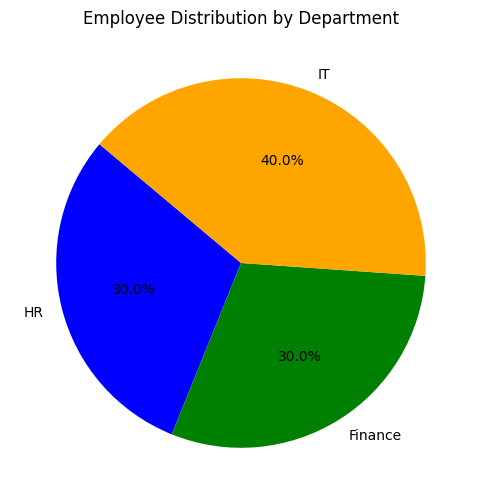

In [21]:
#Step 1: Count employees per department
dept_counts = df_csv.groupBy("Department").count()

#Step 2: Collect the data for plotting
dept_data = dept_counts.collect()
departments = [row["Department"] for row in dept_data]
counts = [row["count"] for row in dept_data]

#Step 3: Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=departments, autopct="%1.1f%%", colors=["blue", "green", "orange"], startangle=140)
plt.title("Employee Distribution by Department")
plt.show()

Line Chart for Age Trends

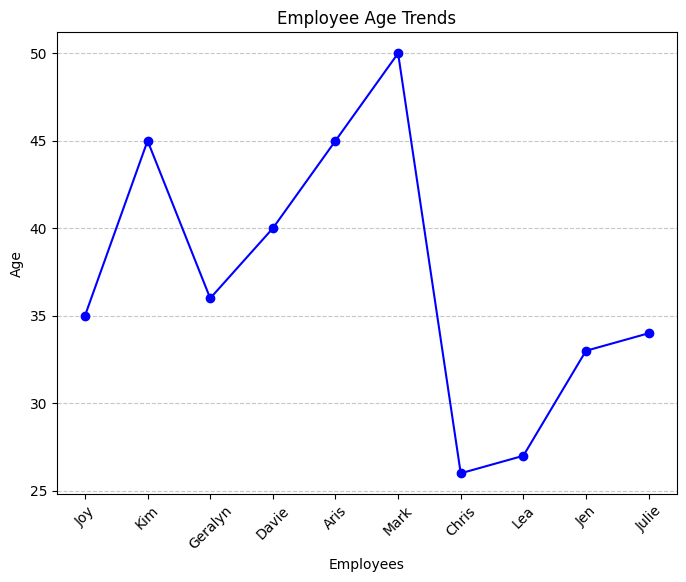

In [22]:
#Step 1: Collect age data
age_data = df_csv.select("Name", "Age").collect()
names=[row["Name"] for row in age_data]
ages=[row["Age"] for row in age_data]


#Step 2: Create a line chart
plt.figure(figsize=(8,6))
plt.plot(names, ages, marker="o", linestyle="-", color="blue")
plt.xlabel("Employees")
plt.ylabel("Age")
plt.title("Employee Age Trends")
plt.xticks(rotation=45) #Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Scatter Plot for Age vs. Department

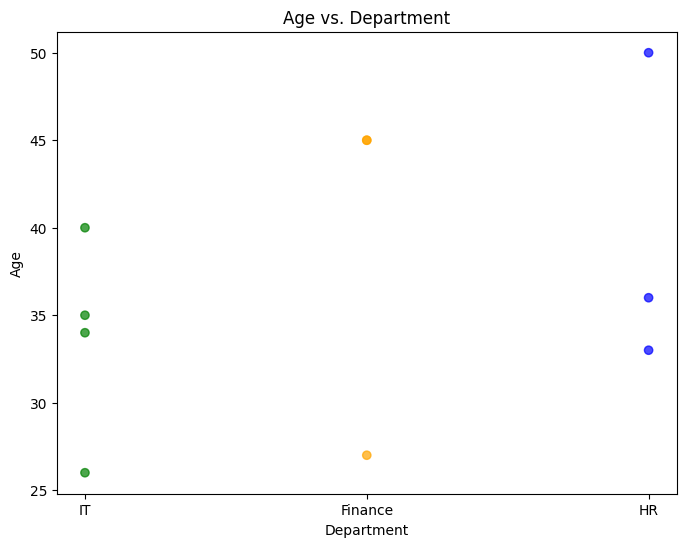

In [23]:
#Step 1: Extract age and department data
age_dept_data = df_csv.select("Age", "Department").collect()
ages=[row["Age"] for row in age_dept_data]
departments=[row["Department"] for row in age_dept_data]

#Step 2: Create a scatter plot
plt.figure(figsize=(8, 6))
colors = {'HR': 'blue', 'IT': 'green', 'Finance': 'orange'}
plt.scatter(departments, ages, c=[colors[dept] for dept in departments], alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Age")
plt.title("Age vs. Department")
plt.show()

Histogram for Age Distribution by Department

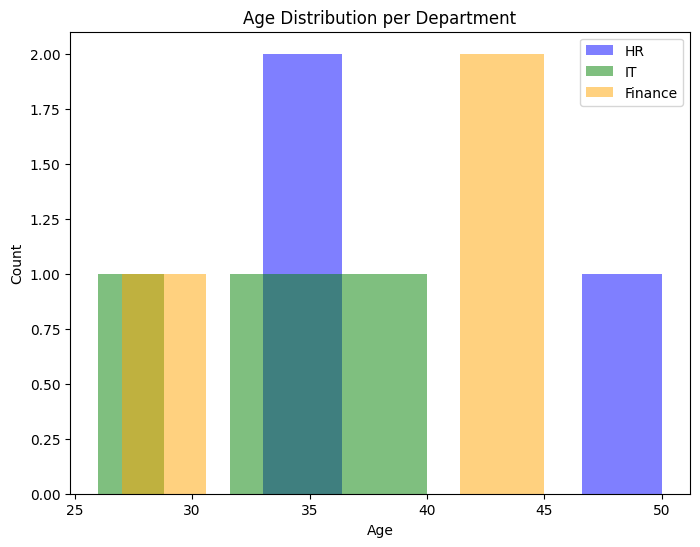

In [25]:
#Step 1: Extract age and department data
age_dept_data = df_csv.select("Age", "Department").collect()
ages=[row["Age"] for row in age_dept_data]
departments=[row["Department"] for row in age_dept_data]

#Step 2: Create histograms for each department
plt.figure(figsize=(8, 6))

#HR Histogram
plt.hist([age for i, age in enumerate(ages) if departments[i] == "HR"], bins=5, alpha=0.5, label="HR", color="blue")

#IT Histogram
plt.hist([age for i, age in enumerate(ages) if departments[i] == "IT"], bins=5, alpha=0.5, label="IT", color="green")

#Finance Histogram
plt.hist([age for i, age in enumerate(ages) if departments[i] == "Finance"], bins=5, alpha=0.5, label="Finance", color="orange")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution per Department")
plt.legend(loc="upper right")
plt.show()